In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/data.csv")

In [3]:
df.head()

,URL,Bread Flour,All Purpose Flour,Wheat Flour,Rye Flour,Water,Salt,Starter,Instant Yeast,Min Bulk Ferment,Min Fridge Ferment,Min Final Proof
0,https://www.theperfectloaf.com/best-sourdough-...,843,0,94,0.0,815.0,19.000,30,0.00,240,900,0
1,https://www.theperfectloaf.com/beginners-sourd...,811,0,152,51.0,730.0,18.000,38,0.00,240,960,0
2,https://www.allrecipes.com/recipe/260540/chef-...,394,0,0,0.0,250.0,8.000,100,0.00,240,720,180
3,https://www.kingarthurbaking.com/recipes/rusti...,0,602,0,0.0,340.0,14.225,227,5.67,90,0,60
4,https://www.kingarthurbaking.com/recipes/merli...,0,659,0,0.0,379.0,11.380,227,4.25,60,720,60


In [4]:
df["total_weight"] = (df["Bread Flour"] +df["All Purpose Flour"] + 
                     df["Wheat Flour"] + df["Rye Flour"] + 
                     df["Water"] + df["Salt"] + df["Instant Yeast"])

In [5]:
final_features = pd.DataFrame()
final_features["white_percent"] = (df["Bread Flour"] +df["All Purpose Flour"]) / df["total_weight"]
final_features["wheat_percent"] = (df["Wheat Flour"]) / df["total_weight"]
final_features["rye_percent"] = (df["Rye Flour"]) / df["total_weight"]
final_features["water_percent"] = (df["Water"]) / df["total_weight"]
final_features["salt_percent"] = (df["Salt"]) / df["total_weight"]
final_features["starter_percent"] = (df["Starter"]) / df["total_weight"]
final_features["instant_yeast_percent"] = (df["Instant Yeast"]) / df["total_weight"]
final_features["bulk"] = df["Min Bulk Ferment"]
final_features["fridge"] = df["Min Fridge Ferment"]
final_features["final"] = df["Min Final Proof"]

### Standardize Variables

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Scale all
#scaler = StandardScaler()
scaler = MinMaxScaler()

# Scale all
#final_features = scaler.fit_transform(final_features)
for feature in final_features.columns:
    #if "percent" in feature:
    #final_features[feature] = (final_features[feature] - final_features[feature].mean())/final_features[feature].std()
    # Consider negatives later...
    final_features[feature] = (final_features[feature] - final_features[feature].mean())/(max(final_features[feature]) - min(final_features[feature]))


### Plot first two t-SNEs

In [7]:
from sklearn.manifold import TSNE
tsne_vars = TSNE().fit_transform(final_features)

Text(0, 0.5, 't-SNE 1')

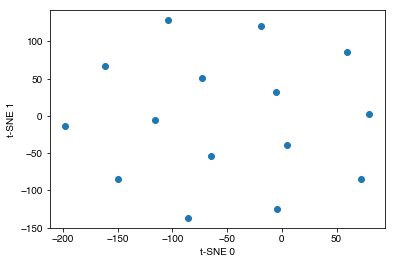

In [8]:
plt.scatter(x=tsne_vars[:,0], y=tsne_vars[:,1])
plt.xlabel("t-SNE 0")
plt.ylabel("t-SNE 1")

In [9]:
from sklearn.decomposition import PCA
pca_vars = PCA(n_components=2).fit_transform(final_features)

Text(0, 0.5, 'PCA 1')

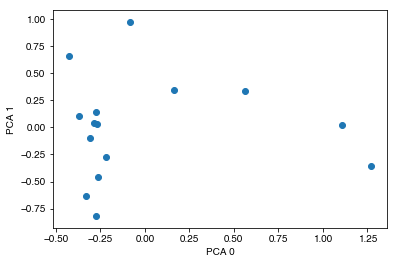

In [10]:
plt.scatter(x=pca_vars[:,0], y=pca_vars[:,1])
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")

### k-Means Clusters

In [11]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []
K = range(1,len(final_features))
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(final_features)
    kmeanModel.fit(final_features)
    distortions.append(sum(np.min(cdist(final_features, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / final_features.shape[0])

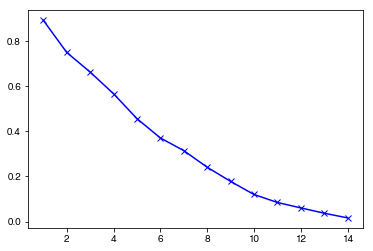

In [12]:
plt.plot(K, distortions, 'bx-')

In [13]:
# Final
kmeans = KMeans(n_clusters=4)
kmeans.fit(final_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'PCA 1')

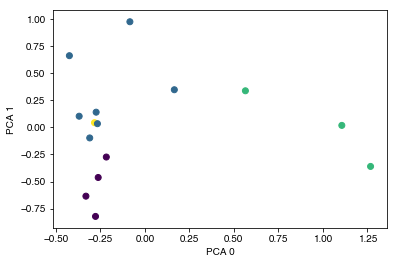

In [14]:
plt.scatter(x=pca_vars[:,0], y=pca_vars[:,1], c=kmeans.labels_)
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")

In [15]:
df["cluster"] = kmeans.labels_

In [16]:
df

,URL,Bread Flour,All Purpose Flour,Wheat Flour,Rye Flour,Water,Salt,Starter,Instant Yeast,Min Bulk Ferment,Min Fridge Ferment,Min Final Proof,total_weight,cluster
0,https://www.theperfectloaf.com/best-sourdough-...,843,0,94,0.0,815.0,19.000,30,0.00,240,900,0,1771.000,0
1,https://www.theperfectloaf.com/beginners-sourd...,811,0,152,51.0,730.0,18.000,38,0.00,240,960,0,1762.000,0
2,https://www.allrecipes.com/recipe/260540/chef-...,394,0,0,0.0,250.0,8.000,100,0.00,240,720,180,652.000,1
3,https://www.kingarthurbaking.com/recipes/rusti...,0,602,0,0.0,340.0,14.225,227,5.67,90,0,60,961.895,1
4,https://www.kingarthurbaking.com/recipes/merli...,0,659,0,0.0,379.0,11.380,227,4.25,60,720,60,1053.630,1
5,https://www.delish.com/cooking/recipe-ideas/a2...,300,0,100,0.0,100.0,12.000,100,0.00,240,720,0,512.000,3
6,Flour Water Salt Yeast - Pain De Campagne,749,9,60,0.0,620.0,21.000,360,2.00,300,720,0,1461.000,1
7,Flour Water Salt Yeast - Field Blend,590,0,60,150.0,590.0,21.000,360,2.00,300,720,0,1413.000,0
8,Flour Water Salt Yeast - Field Blend 2,540,0,85,175.0,620.0,21.000,360,2.00,300,660,0,1443.000,0
9,Flour Water Salt Yeast - Overnight Country Blonde,804,0,26,50.0,684.0,22.000,216,0.00,720,0,240,1586.000,2


In [17]:
final_features["cluster"] = kmeans.labels_
final_features

,white_percent,wheat_percent,rye_percent,water_percent,salt_percent,starter_percent,instant_yeast_percent,bulk,fridge,final,cluster
0,-0.172050,0.034413,-0.181695,0.236881,-0.230276,-0.421401,-0.185595,-0.130303,0.366667,-0.230556,0
1,-0.234562,0.204337,0.056973,0.063632,-0.269055,-0.410142,-0.185595,-0.130303,0.429167,-0.230556,0
2,0.337800,-0.237343,-0.181695,-0.052898,-0.113685,-0.089405,-0.185595,-0.130303,0.179167,0.519444,1
3,0.423456,-0.237343,-0.181695,-0.166031,0.076801,0.111636,0.814405,-0.357576,-0.570833,0.019444,1
4,0.421902,-0.237343,-0.181695,-0.142474,-0.224803,0.061638,0.498703,-0.403030,0.179167,0.019444,1
5,0.264847,0.762657,-0.181695,-0.763119,0.730945,0.012647,-0.185595,-0.130303,0.179167,-0.230556,3
6,-0.001876,-0.027076,-0.181695,0.101630,0.045428,0.136977,0.046638,-0.039394,0.179167,-0.230556,1
7,-0.404341,-0.019933,0.693647,0.075899,0.082358,0.157346,0.054527,-0.039394,0.179167,-0.230556,0
8,-0.576544,0.064251,0.818305,0.121615,0.058989,0.144457,0.049535,-0.039394,0.116667,-0.230556,0
9,-0.049116,-0.153408,0.078259,0.127705,0.007435,-0.131216,-0.185595,0.596970,-0.570833,0.769444,2
